# Natural Language Processing - Hotel TripAdvisor Reviews

 In this project, I am going to use various machine learning models to predict whether TripAdvisor reviews are positive or negative. I will use a Random Forest Classifier, Gradient Boosting Classifier and a Recurrent Neural Network model to assess which model best predicts whether TripAdvisor reviews are positive or negative.

The dataset was downloaded from Kaggle: https://www.kaggle.com/andrewmvd/trip-advisor-hotel-reviews

In [1]:
# Import statements

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re
import string

%matplotlib inline
pd.set_option('display.max_colwidth', 150)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


## Exploratory Data Analysis

We must read in and perform breif exploratory data analysis on our data to better understand it

In [2]:
# Read in our data
df = pd.read_csv('tripadvisor_hotel_reviews.csv')
df.head()

,Review,Rating
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quic...",4
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not...",2
2,nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsatte...,3
3,"unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs an...",5
4,"great stay great stay, went seahawk game awesome, downfall view building did n't complain, room huge staff helpful, booked hotels website seahawk ...",5


In [3]:
# Check the shape and size of our data set
df.shape

(20491, 2)

In [4]:
# Check for null values
df.isnull().sum()

Review    0
Rating    0
dtype: int64

In [5]:
# Check how many reviews there are of each rating
df['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

<AxesSubplot:xlabel='Rating', ylabel='count'>

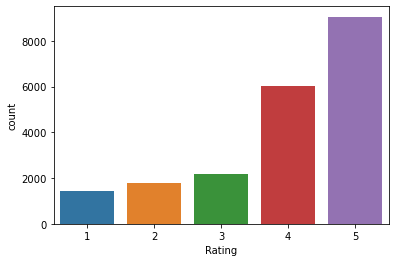

In [6]:
# Produce a countplot of the distribution of ratings for each review
sns.countplot(data=df, x='Rating')

In [7]:
# Split the positive ratings as rating above 3 and negative ratings as 3 and below
def positive_rating(rating):
    if int(rating) > 3:
        return 1
    else:
        return 0

df['positive_rating'] = df['Rating'].apply(lambda x: positive_rating(x))
df.head()

,Review,Rating,positive_rating
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quic...",4,1
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not...",2,0
2,nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsatte...,3,0
3,"unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs an...",5,1
4,"great stay great stay, went seahawk game awesome, downfall view building did n't complain, room huge staff helpful, booked hotels website seahawk ...",5,1


<AxesSubplot:title={'center':'Distribution of Positive Ratings'}, xlabel='positive_rating', ylabel='count'>

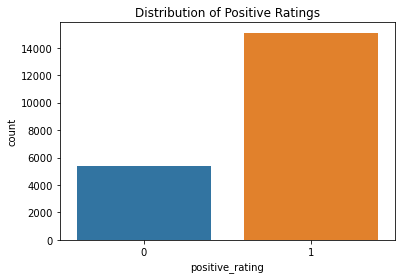

In [10]:
# Produce countplot to view distribution of positive ratings
plt.title('Distribution of Positive Ratings')
sns.countplot(data=df, x='positive_rating')

## Feature Engineering

The point of feature engineering is to create new features from the already exisiting data. We can create some features and check by viewing the distribution whether these features may be valuable at prediciting positive or negative hotel reviews

### Punctuation Percentage

In [12]:
# This function returns the ratio of punctuation in the text compared to other characters
def punct_perc(text):
    punct_num = sum([1 for char in text if char in string.punctuation])
    punct_per = punct_num / (len(text) - text.count(" "))
    return punct_per

# Test this function of the first row
print(df['Review'].iloc[0])
print('\n {}'.format(punct_perc(df['Review'].iloc[0])))

nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  

 0.023762376237623763


In [13]:
# Apply the punct_perc function on all reviews in the data set
df['punct%'] = df['Review'].apply(lambda x: punct_perc(x))
df.head()

,Review,Rating,positive_rating,punct%
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quic...",4,1,0.023762
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not...",2,0,0.018081
2,nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsatte...,3,0,0.026468
3,"unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs an...",5,1,0.031373
4,"great stay great stay, went seahawk game awesome, downfall view building did n't complain, room huge staff helpful, booked hotels website seahawk ...",5,1,0.036731


### Number Percentage

In [14]:
# This function returns the ratio of digits compared to other characters
number_list = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

def number_perc(text):
    number_count = sum([1 for char in text if char in number_list])
    number_per = number_count / (len(text) - text.count(" "))
    return number_per

# Test this function on the first row
print(df['Review'].iloc[0])
print('\n {}'.format(number_perc(df['Review'].iloc[0])))

nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  

 0.0039603960396039604


In [15]:
# Apply the number_perc function on all reviews in the data set
df['number%'] = df['Review'].apply(lambda x: number_perc(x))
df.head()

,Review,Rating,positive_rating,punct%,number%
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quic...",4,1,0.023762,0.003960
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not...",2,0,0.018081,0.009040
2,nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsatte...,3,0,0.026468,0.019851
3,"unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs an...",5,1,0.031373,0.001961
4,"great stay great stay, went seahawk game awesome, downfall view building did n't complain, room huge staff helpful, booked hotels website seahawk ...",5,1,0.036731,0.001837


### Text Length

In [16]:
# Apply the len function to the data set to count the number of characters for each review
df['text_length'] = df['Review'].apply(len)
df.head()

,Review,Rating,positive_rating,punct%,number%,text_length
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quic...",4,1,0.023762,0.003960,593
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not...",2,0,0.018081,0.009040,1689
2,nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsatte...,3,0,0.026468,0.019851,1427
3,"unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs an...",5,1,0.031373,0.001961,600
4,"great stay great stay, went seahawk game awesome, downfall view building did n't complain, room huge staff helpful, booked hotels website seahawk ...",5,1,0.036731,0.001837,1281


In [18]:
# Find the review with the maximum text length
df[df['text_length'] == df['text_length'].max()]

,Review,Rating,positive_rating,punct%,number%,text_length
7072,"honest review visit 5/21-5/28 let begin saying heard secrets couple work went resort year returned raving experiences, all-inclusive regular cruis...",3,0,0.031896,0.006569,13501


### Evaluation for each engineered feature

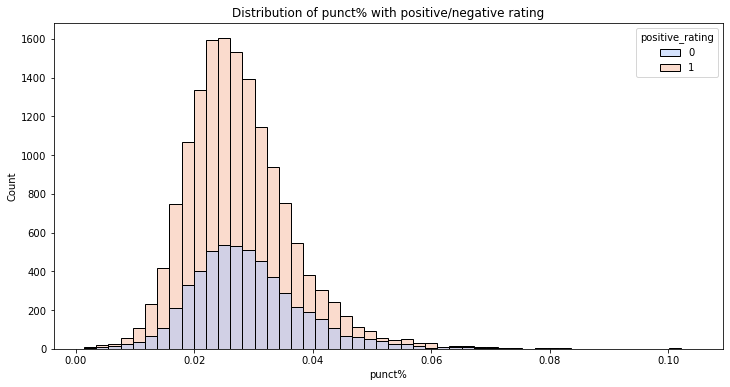

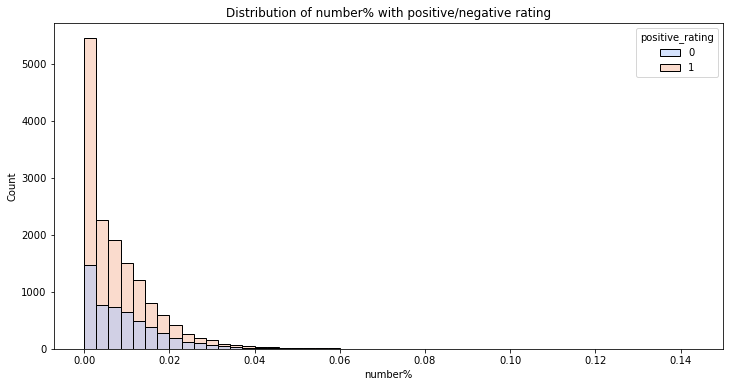

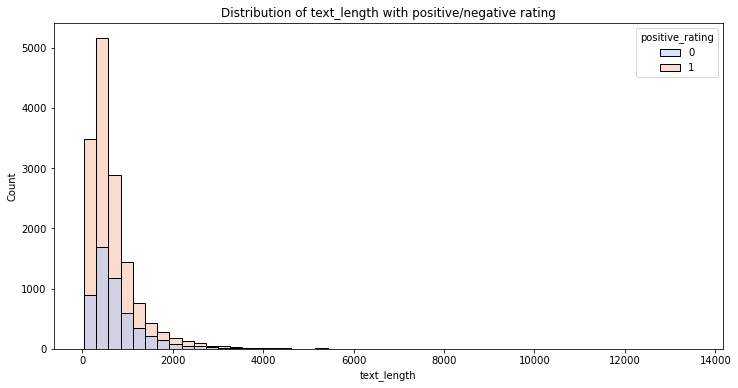

In [22]:
# Draw a histogram for each of the features to see if there's a correlation between feature and positive/negative rating
for i in ['punct%', 'number%', 'text_length']:
    plt.figure(figsize=(12,6))
    sns.histplot(data=df, x=i, hue='positive_rating', bins=50, fill=True, palette='coolwarm')
    plt.title('Distribution of {} with positive/negative rating'.format(i))
    plt.show()

From the feature distributions above, there doesn't appear to be any correlation between the feature and positive/negative ratings as the proportions for both positive and negative seem to be fairly equal for all bins and all features

## Cleaning the Text Data

Cleaning the data is important as it means there's less data for the model to look at. For example common words are removed and similar words are combine together. It is a necessary step to highlight attributes that we want the machine learning system to pick up on

In [27]:
# A function is created which removes punctuation, removes digits, splits the string into tokens, removes stopwords and stemms
# or lemmatizes each word

ps = nltk.PorterStemmer()
number_list = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
def clean_text(text):
    no_punc = "".join([char.lower() for char in text if char not in string.punctuation])
    no_digit = "".join([char for char in no_punc if char not in number_list])
    tokens = re.split('\W+', no_digit)
    no_stopwords = [ps.stem(word) for word in tokens if word not in nltk.corpus.stopwords.words('english')]
    return no_stopwords

# Test this function on the first row in the dataset
print(df['Review'].iloc[0])
print(clean_text(df['Review'].iloc[0]))

nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  
['nice', 'hotel', 'expens', 'park', 'got', 'good', 'deal', 'stay', 'hotel', 'anniversari', 'arriv', 'late', 'even', 'took', 'advic', 'previou', 'review', 'valet', 'park', 'check', 'quick', 'easi', 'littl', 'disappoint', 'nonexist', 'view', 'room', 'room', 'clean', 'nice', 'size', 'bed', 'comfort', 'woke', 'stiff', 'neck', 'high', 'pillow', 'soundproof', 'like', 'heard', 'music', 'room', 'night', 'morn',

In [28]:
# Apply the clean text function to every row in the table and create a new column
df['clean_review'] = df['Review'].apply(lambda x: clean_text(x))
df.head()

,Review,Rating,positive_rating,punct%,number%,text_length,clean_review
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quic...",4,1,0.023762,0.003960,593,"[nice, hotel, expens, park, got, good, deal, stay, hotel, anniversari, arriv, late, even, took, advic, previou, review, valet, park, check, quick,..."
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not...",2,0,0.018081,0.009040,1689,"[ok, noth, special, charg, diamond, member, hilton, decid, chain, shot, th, anniversari, seattl, start, book, suit, paid, extra, websit, descript,..."
2,nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsatte...,3,0,0.026468,0.019851,1427,"[nice, room, experi, hotel, monaco, seattl, good, hotel, nt, levelposit, larg, bathroom, mediterranean, suit, comfort, bed, pillowsattent, houseke..."
3,"unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs an...",5,1,0.031373,0.001961,600,"[uniqu, great, stay, wonder, time, hotel, monaco, locat, excel, short, stroll, main, downtown, shop, area, pet, friendli, room, show, sign, anim, ..."
4,"great stay great stay, went seahawk game awesome, downfall view building did n't complain, room huge staff helpful, booked hotels website seahawk ...",5,1,0.036731,0.001837,1281,"[great, stay, great, stay, went, seahawk, game, awesom, downfal, view, build, nt, complain, room, huge, staff, help, book, hotel, websit, seahawk,..."


## Vectorization

We can convert the cleaned text data into numeric form as this is the only way Python and a machine learning model can understand. There are multiple ways to vectorize text data including CountVectorizer, N-grams but the method of choice is the TfidfVectorizer. Each element in the Tfidf vectorizer matrix represents a weighting that idenitifes how important a word is to an individual review

Usually we would only vectorize on the training data and fit the test data to the vectorized model however, looking forward to the next steps we will be performing cross-validation hence it is easier to fit the vectorizer on the entire data set. 

After the grid-search cross-validation method, we will be splitting the data into a training set and a holdout test set as usual and for this we shall only fit the vectorizer model on the training set

In [29]:
# Import the vectorizer model
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
# We instantiate the model and pass the analyzer hyperparameter as this will clean and tokenize our data
tfidf = TfidfVectorizer(analyzer=clean_text)

In [31]:
# Fit and transform the text data into a vectorized model
tfidf_model = tfidf.fit_transform(df['Review'])

In [32]:
# Check the type of the vectorized model, it is a sparse matrix which means we will have to convert it to a DataFrame to view it
type(tfidf_model)

scipy.sparse.csr.csr_matrix

In [35]:
# The size of this matrix is huge so we can't view it as a DataFrame as there isn't enough memory
tfidf_model.shape

(20491, 62222)

## Machine Learning Classifiers

There are three different machine learning classifiers that I'll be testing to see which machine learning model will provide the best results and best predictions positive/negative reviews

### Random Forest Classifier

The first machine learning model that I'll be testing is the random forest classifier. Initially, I will be using Grid Search to find the parameters which provide the most accurate results and I'll be combining this with cross-validation with a split of 5 to find robust results for this model.

I will then test the random forest model the 'normal' way with a holdout test set based on the best parameters found from the Grid-Search method

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#### Random Forest Classifier with GridSearchCV 

In [37]:
# Instantiate the Random Forest Classifier Model
rf = RandomForestClassifier()

In [38]:
# Create a parameter dictionary to put in the grid-search model for it to cycle through hyperparameters and find the best
# combination for our model, we use a split of cv=5 and n_jobs=-1 as this means the trees will be built in parallel

params = {'n_estimators': [50, 100, 200, 300],
         'max_depth':[30, 90, None]}

gs = GridSearchCV(rf, params, cv=5, n_jobs=-1)

In [40]:
# Fitting our grid-search cross-validation model onto the review data
gs_model = gs.fit(tfidf_model, df['positive_rating'])

In [41]:
# We can view the accuracy results for each cross-validation and an average for each hyperparameter tested
pd.DataFrame(gs_model.cv_results_).sort_values('mean_test_score',ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,28.558113,0.545393,0.185944,0.004327,None,50,"{'max_depth': None, 'n_estimators': 50}",0.839473,0.830405,0.819424,0.824793,0.821132,0.827045,0.007264,1
9,56.677948,1.076084,0.346076,0.015617,None,100,"{'max_depth': None, 'n_estimators': 100}",0.841181,0.824793,0.816740,0.826257,0.819180,0.825630,0.008527,2
10,113.276797,1.318461,0.673372,0.036107,None,200,"{'max_depth': None, 'n_estimators': 200}",0.848500,0.819668,0.812592,0.825037,0.816252,0.824410,0.012723,3
11,165.404130,9.464182,0.962169,0.054056,None,300,"{'max_depth': None, 'n_estimators': 300}",0.844352,0.824305,0.814544,0.826013,0.811127,0.824068,0.011606,4
4,24.116355,0.250976,0.166723,0.010302,90,50,"{'max_depth': 90, 'n_estimators': 50}",0.837033,0.826013,0.807711,0.814788,0.811127,0.819334,0.010779,5
5,48.690206,0.299545,0.336033,0.028113,90,100,"{'max_depth': 90, 'n_estimators': 100}",0.837033,0.817472,0.809907,0.814056,0.815764,0.818846,0.009434,6
6,97.227059,1.796741,0.632456,0.037477,90,200,"{'max_depth': 90, 'n_estimators': 200}",0.842645,0.816252,0.807711,0.815764,0.811615,0.818797,0.012320,7
7,145.359416,1.715338,0.931262,0.053990,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.834350,0.816984,0.808687,0.816008,0.808931,0.816992,0.009340,8
0,9.839335,0.196484,0.133312,0.008468,30,50,"{'max_depth': 30, 'n_estimators': 50}",0.785313,0.772328,0.771352,0.770132,0.772816,0.774388,0.005539,9
3,58.903422,1.068535,0.684376,0.061650,30,300,"{'max_depth': 30, 'n_estimators': 300}",0.785801,0.769888,0.763543,0.770864,0.768424,0.771704,0.007485,10


From the Grid Search above, we can clearly see that having the max_depth as None provides the best results in terms of accuracy. The hyperparameter n_estimators doesn't seem to be making too much difference so for the random forest model test with a single holdout test we can keep the n_estimators as 100. N_estimators signifies the number of trees in the model and max_depth is the maximum depth of each decision tree

#### Random Forest Classifier with single holdout test set

In [53]:
# Import Random forest model and train test split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [54]:
# Instantiate Random Forest model
rf_holdout = RandomForestClassifier(n_estimators=100, max_depth=None, n_jobs=-1)

In [55]:
# Split the training and test data and view the X_train_df to make sure it is split correctly
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(df['Review'], df['positive_rating'], test_size=0.33)
X_train_rf.head()

11712    fantastic luna wife satisfaied hotel, located queit area remarkable cleaning room fantastic staff want thanks, located near underground station pi...
1856     excellent location 4th trip san fran stayed levels cost location reviews said great location handy public transportation importanly free parking d...
5400     non-smokers beware according staff hotel floors non-smoking rooms, requested room 6 weeks prior arrival, arrived hotel fully booked non-smoking ro...
4966     nice, ca n't add reviewer st. paul wrote, magnificent hotel gorgeous lobby gorgeous rooms huge fantastic bathrooms helpful gracious staff, heavenl...
14733    service, arrival caribe club shown room smelt bed not ideal mother daughter patio door obviously broken previously lock did not work bent, porter ...
Name: Review, dtype: object

In [56]:
# View size of the data objects when the data has been split into training and test
print(X_train_rf.shape, X_test_rf.shape)

(13728,) (6763,)


In [57]:
# import the vectorization method (tf-idf)
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
# Instantiate the vectorization model and pass the clean_text function to the text into a list of tokens
tfidf_rf = TfidfVectorizer(analyzer=clean_text)

In [59]:
# Fit the vectorization model on the training data only
tfidf_rf_model = tfidf_rf.fit(X_train_rf)

In [61]:
# Transform the training and test data using the trained vectorization model
X_train_rf_features = tfidf_rf_model.transform(X_train_rf)
X_test_rf_features = tfidf_rf_model.transform(X_test_rf)

In [62]:
# Fit the random forest model on the vectorization features using the test labels as well
rf_holdout_model = rf_holdout.fit(X_train_rf_features, y_train_rf)

In [63]:
# Make predictions on the vectorized test set based on the trained random forest model
predictions_rf = rf_holdout_model.predict(X_test_rf_features)

In [72]:
# Use these metrics to calculate the precision, recall and accuracy of our model compared to the true values
from sklearn.metrics import precision_score, recall_score
precision_rf =  precision_score(y_test_rf, predictions_rf)
recall_rf = recall_score(y_test_rf, predictions_rf)
accuracy_rf = sum(predictions_rf==y_test_rf) / len(predictions_rf)

print('For the Random Forest Classifier Model: Precision - {} / Recall - {} / Accuracy - {}'.format(
    precision_rf, recall_rf, accuracy_rf))

For the Random Forest Classifier Model: Precision - 0.8239262794141846 / Recall - 0.9936495336376265 / Accuracy - 0.8370545615850954


In [98]:
# This finds the most important features in our model and with some manipulation we can find the tokens which are most important
# for our model to distinguish between positive and negative reviews
feature_importances_rf = sorted(zip(rf_holdout_model.feature_importances_, pd.DataFrame(X_train_rf_features.toarray()).columns, 
          ), reverse=True)[:10]

feat_importance_rf = []
for i in feature_importances_rf:
    (importance, column) = i
    x = (importance, column, tfidf_rf_model.get_feature_names()[column])
    feat_importance_rf.append(x)

feat_importance_rf

[(0.012853347075198047, 18198, 'great'),
 (0.0073094685226895, 28999, 'ok'),
 (0.006798120670181989, 47455, 'worst'),
 (0.006682802293517586, 3289, 'bad'),
 (0.0065845410335814225, 14513, 'excel'),
 (0.0064688646620154385, 24542, 'love'),
 (0.006359680267885049, 11833, 'dirti'),
 (0.005954300197542125, 42859, 'told'),
 (0.005269924050878327, 35534, 'room'),
 (0.005077321850261277, 39481, 'staff')]

This Random Classifier model was tested using the hyperparamters identified as being best suited by the GridSearchCV model. This metrics for the performance of this model show a high recall meaning that almost all reviews that are predicted positive are actually positive, whereas it has a lower precision which means there are some reviews which are being predicted as positive when in fact they are not positive. We can also see listed the tokens which were most important to the model in predicting whether reviews were positive or negative. Overall, the Random Forest Classifier model is fairly accurate in predicitng positive and negative reviews however, we must test other machine learning models to see if we can improve performance.

### Gradient Boosting Classifier

The gradient boosting classifier is a different machine learning model. It is slighlty different to Random Forest Classifier as it places extra weighting to the ones it got wrong when training, it focusses heavily on observations that it doesn't quite understand yet. This is an example of the 'boosting' technique whereas, Random Forests are an example of a technique called 'bagging'. As this model relies on previous decision trees to be built, these decision trees can't be built in parallel meaning this model takes much longer to train than the Random Forest Classifier

In [99]:
# import gradient boosting classifier model
from sklearn.ensemble import GradientBoostingClassifier

In [100]:
# Instantiate the model
gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=3)

In [101]:
# Train/fit the model onto our training data, we can use the same vectorized features as with Random Forest Classifier
gb_model = gb.fit(X_train_rf_features, y_train_rf)

In [102]:
# Make predictions on the vectorized test data set based on the trained gradient boosting model
predictions_gb = gb_model.predict(X_test_rf_features)

In [103]:
# Use these metrics to calculate the precision, recall and accuracy of our gb model compared to the true values
from sklearn.metrics import precision_score, recall_score
precision_gb =  precision_score(y_test_rf, predictions_gb)
recall_gb = recall_score(y_test_rf, predictions_gb)
accuracy_gb = sum(predictions_gb==y_test_rf) / len(predictions_gb)

print('For the Gradient Boosting Model: Precision - {} / Recall - {} / Accuracy - {}'.format(
    precision_gb, recall_gb, accuracy_gb))

For the Gradient Boosting Model: Precision - 0.8630161261740209 / Recall - 0.966461599523715 / Accuracy - 0.8607127014638474


In [107]:
# This finds the most important features in our Gradient Boosting model and with some manipulation we can find the tokens 
# which are most important for our model to distinguish between positive and negative reviews
feature_importances_gb = sorted(zip(gb_model.feature_importances_, pd.DataFrame(X_train_rf_features.toarray()).columns), 
                                reverse=True)[:10]

feat_importance_gb = []
for i in feature_importances_gb:
    (importance, column) = i
    x = (importance, column, tfidf_rf_model.get_feature_names()[column])
    feat_importance_gb.append(x)

feat_importance_gb

[(0.12408118618771138, 18198, 'great'),
 (0.06973718482880502, 14513, 'excel'),
 (0.06367399637966374, 42859, 'told'),
 (0.05151134779118078, 24542, 'love'),
 (0.0443524851583774, 28999, 'ok'),
 (0.04236519787076247, 11833, 'dirti'),
 (0.041797390094164576, 47455, 'worst'),
 (0.03409508718486469, 3289, 'bad'),
 (0.030011679562879413, 41690, 'terribl'),
 (0.02930031576259474, 47257, 'wonder')]

The gradient boosting classifier has better precision than Random Forest classifier meaning there's a higher proportion of reviews that are predicted as positive that are actually positive, this means there's a larger proportion which are correctly predicted negative as well however, this classifier has slighlty lower recall. This could be because the Gradient Boosing Classifier tends slighlty more towards observations it had got wrong so would naturally focus a bit more on getting the negative reviews right hence the higher precision and higher recall. Overall, it has a better accuracy so it is a better model for this prediction task. This Gradient Boosting classifier was also not fine tuned with Grid Search to find the best possible parameter so it is possible to improve this model further also. It is also important to note that many of the most important features for prediction were very similar to the Random Forest model.

### Recurrent Neural Network Model

In [108]:
# import pre-processing packages
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [111]:
# initialise tokenizer function
tk = Tokenizer()

In [112]:
# train the tokenizer to create tokens based on the training data
tk.fit_on_texts(X_train_rf)

In [113]:
# fit and transform the tokenizer model to both the training and test data, this converts every word in each review into an 
# integer representing that word
X_train_sequences = tk.texts_to_sequences(X_train_rf)
X_test_sequences = tk.texts_to_sequences(X_test_rf)

In [125]:
# Check the number of training reviews
print(len(X_train_sequences))

# Count the number of reviews which have more than x nubmer of words
print(sum([1 for sublist in X_train_sequences if len(sublist) > 850]))

13728
36


In [126]:
# pad sequences with zeros to give 850 items within each array representing each review
X_train_seq_pad = pad_sequences(X_train_sequences, 850)
X_test_seq_pad = pad_sequences(X_test_sequences, 850)

In [134]:
# import model and layers from tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM

In [135]:
# Instantiate sequential model
model_rnn = Sequential()

In [136]:
# Add the layers to our model
model_rnn.add(Embedding(len(tk.index_word)+1, 32))
model_rnn.add(LSTM(32))
model_rnn.add(Dense(32, activation='relu'))
model_rnn.add(Dense(1, activation='sigmoid'))
model_rnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          1363456   
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,372,865
Trainable params: 1,372,865
Non-trainable params: 0
_________________________________________________________________


In [137]:
import tensorflow.keras.backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

In [138]:
# Compile the model, this essentially actually builds the model we are trying to create
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy', recall_m, precision_m])

In [139]:
# Train the RNN model on the training data and evaluate each epoch on test data
history = model_rnn.fit(X_train_seq_pad, y_train_rf, epochs=10, validation_data=(X_test_seq_pad, y_test_rf))

Epoch 1/10
429/429 [==============================] - 93s 210ms/step - loss: 0.4729 - accuracy: 0.7840 - recall_m: 0.9639 - precision_m: 0.7979 - val_loss: 0.2620 - val_accuracy: 0.9027 - val_recall_m: 0.9623 - val_precision_m: 0.9124
Epoch 2/10
429/429 [==============================] - 90s 209ms/step - loss: 0.1784 - accuracy: 0.9347 - recall_m: 0.9676 - precision_m: 0.9453 - val_loss: 0.2972 - val_accuracy: 0.8858 - val_recall_m: 0.9181 - val_precision_m: 0.9280
Epoch 3/10
429/429 [==============================] - 90s 209ms/step - loss: 0.1103 - accuracy: 0.9650 - recall_m: 0.9825 - precision_m: 0.9703 - val_loss: 0.3682 - val_accuracy: 0.8752 - val_recall_m: 0.8964 - val_precision_m: 0.9340ccuracy:
Epoch 4/10
429/429 [==============================] - 89s 208ms/step - loss: 0.0593 - accuracy: 0.9826 - recall_m: 0.9917 - precision_m: 0.9843 - val_loss: 0.4737 - val_accuracy: 0.8650 - val_recall_m: 0.9631 - val_precision_m: 0.8697
Epoch 5/10
429/429 [==============================] 

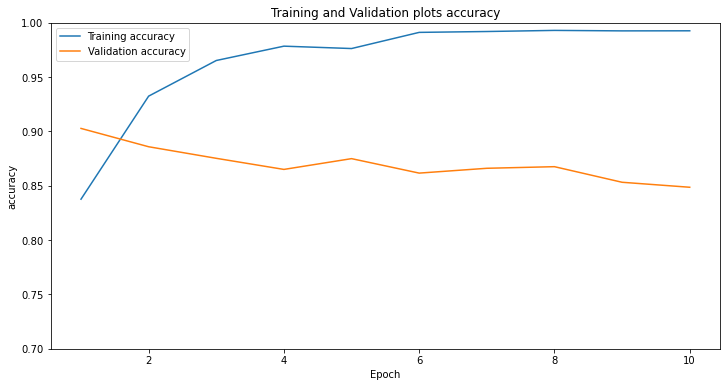

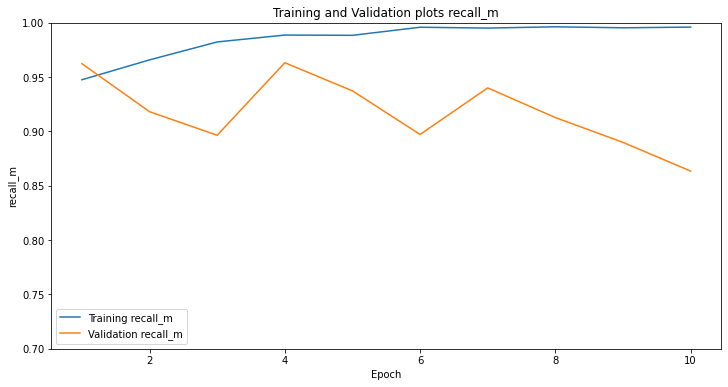

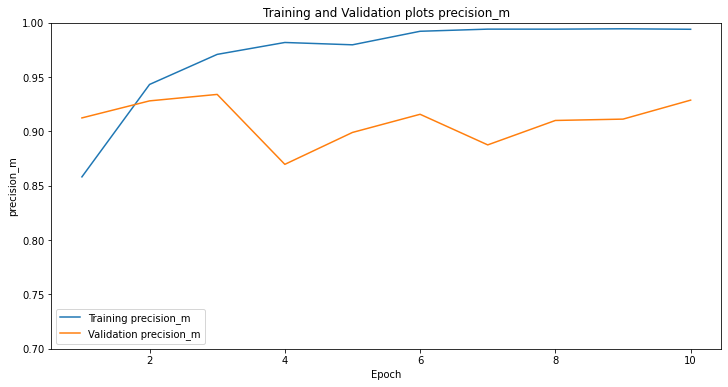

In [150]:
# Plot the training metrics and validation metrics on a line plot
for i in ['accuracy', 'recall_m', 'precision_m']:
    plt.figure(figsize=(12,6))
    epochs = range(1, len(history.history[i]) + 1)

    plt.plot(epochs, history.history[i], label='Training {}'.format(i))
    plt.plot(epochs, history.history['val_{}'.format(i)], label='Validation {}'.format(i))
    plt.xlabel('Epoch')
    plt.ylabel('{}'.format(i))
    plt.ylim(0.7, 1)
    plt.title('Training and Validation plots {}'.format(i))
    plt.legend()
    plt.show()


Overall, the RNN model provides better predictions in terms of indetifying postive and negative reviews. The validation accuracy, precision and recall is fairly high for specific epochs within the test data. However, as can be seen from the graphs above, with greater number of epochs there seems to be a hint of overfitting to the training data, because as the number of epochs approaches 10, the training accuracy, precision and recall all tend towards 1 whereas the validation metrics slighlty reduce. The RNN model can be fine-tuned further to improve performance for example changing the number of epochs, adding dropout layers to prevent overfitting, changing the number of nodes within layers, adding new and more layers etc. 

## Final Evaluation of Machine Learning Classifiers

In [154]:
# Comparison table of each of the machine learning classifiers and their metrics
rf_metrics = [accuracy_rf, precision_rf, recall_rf]
gb_metrics = [accuracy_gb, precision_gb, recall_gb]
rnn_metrics = [history.history['val_accuracy'][1], history.history['val_precision_m'][1], history.history['val_recall_m'][1]]

pd.DataFrame(data=[rf_metrics, gb_metrics, rnn_metrics], 
             index=['Random Forest Classifier', 'Gradient Boosting Classifier', 'Recurrent Neural Network'],
             columns=['Accuracy', 'Precision', 'Recall'])

,Accuracy,Precision,Recall
Random Forest Classifier,0.837055,0.823926,0.993650
Gradient Boosting Classifier,0.860713,0.863016,0.966462
Recurrent Neural Network,0.885849,0.928040,0.918090


The recurrent neural network model is the best model based on the metrics above. The reason for this is because for this project we want a higher precision value as we want to accurately predict negative reviews as well as positive reviews and a higher precision score allows for this. We can also fine tune the RNN much more easily to find possibly even better results without overfitting. The Gradient Boosting Classifier and Random Forest Classifier both perform relatively decently with over 83% accuracy however, the Gradient Boosting Classifier does outperform the Random Forest Classifier. The Random Forest classifier has a very high recall score and this can be misleading as the reason for this is because the classifier is predicting positive reviews in much higher proportions than the other two classifiers. We can also fin tune the Gradient Boosting Classifier to give us better performance by using a Grid Search however, the RNN model is the better model to deploy as it is much easier to fine tune and performs better generally.